In [214]:
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fmin_bfgs

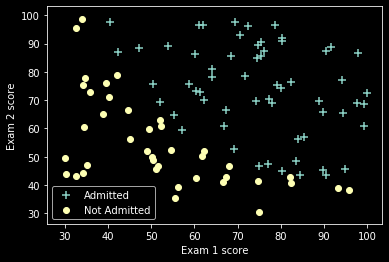

In [215]:
data = pd.read_csv('machine-learning-ex2-master\ex2\ex2data1.txt', header = None)

exams= data.loc[:,0:2]
X = data.loc[:,0:1]
y = data.loc[:,2]
m = y.size
pos = X.loc[y==1]
neg = X.loc[y==0]

ones = np.ones((m,1))
X = np.hstack((ones,X))
theta = np.zeros((3,1))
y = y[:,np.newaxis]

plt.scatter(pos[0],pos[1], marker='+' ,s=60, label="Admitted")
plt.scatter(neg[0],neg[1], marker='o' , label='Not Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc='best')

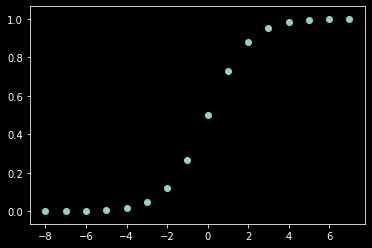

In [216]:
def sigmoid(x):
    return(1 / (1 + np.exp(-x)))
testArray = np.arange(-8,8)
plt.scatter(testArray,sigmoid(testArray))

In [217]:
def costFunction(theta, X, y):
    hx = sigmoid(X.dot(theta))

    J = -1/m*(np.log(hx).T.dot(y)+np.log(1-hx).T.dot(1-y))

    return J

In [218]:
def gradient(theta,X, y):

    # fmin_bfgs gives one dim theta so need to add one more dim
    temp = sigmoid(np.dot(X, theta[...,np.newaxis]))
    temp = temp-y
    temp = np.dot(X.T, temp)
    theta = (1/m) * temp
    return theta.flatten()

In [219]:
def predict(input, theta):
    p =  sigmoid(input.dot(theta.T)) > .5
    return p.astype('int')

In [220]:
res = fmin_bfgs(costFunction,theta, args=(X,y),fprime=gradient)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31
C:\Users\Gurpreet Heir\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [221]:
print(sigmoid(np.array([1,45,85]).dot(res.T)))
print(predict(np.array([1,45,85]),res))
print('prediction of input data')
print(sum(predict(X,res)==y.flatten())/m)

0.7762907240588947
1
prediction of input data
0.89


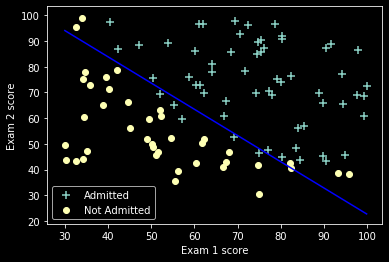

In [223]:
plt.scatter(pos[0],pos[1], marker='+' ,s=60, label="Admitted")
plt.scatter(neg[0],neg[1], marker='o' , label='Not Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_ys = (-1./res[2])*(res[0] + res[1]*boundary_xs)

plt.plot(boundary_xs,boundary_ys,'b-')

plt.legend(loc='best')